In [44]:
%matplotlib inline

In [45]:
# Dependencies
import pandas as pd
import numpy as np
import os
import webbrowser
import io
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Save file path to variable
retail_history_csv = "Datasets/Estimated Annual U.S. Retail Trade Sales Total and E-commerce1- 1998-2018.csv"
US_totalrev_2018_2017_csv = "Datasets/US_Retail_Trade_Sales_2018_2017.csv"

# Dataset 1 Clean-up (Retail History 2018-1998)

In [47]:
# Read with pandas
retail_history_df = pd.read_csv(retail_history_csv)
retail_history_df.head()

,NAICS Code,Unnamed: 1,2018,Unnamed: 3,2017r,Unnamed: 5,2016r,Unnamed: 7,2015r,Unnamed: 9,...,2002,Unnamed: 35,2001,Unnamed: 37,2000,Unnamed: 39,1999,Unnamed: 41,1998,Unnamed: 43
0,NaN,Kind of Business,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,...,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce
1,NaN,Total Retail Trade,"5,269,468","519,635","5,053,151","458,916","4,852,958","397,252","4,725,993","346,188",...,"3,128,552","44,623","3,062,268","34,260","2,983,276","27,608","2,803,090","14,490","2,581,762","4,984"
2,441.0,Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106","1,140,614","30,739","1,094,112","30,145",...,"818,811","7,059","815,579","5,271","796,210","4,090","764,204","1,704","688,415",382
3,442.0,Furniture and home furnishings stores,"116,895","1,533","113,035","1,279","110,404","1,081","106,570",996,...,"94,438",S,"91,484",S,"91,170",S,"84,294",S,"77,412",S
4,443.0,Electronics and appliance stores,"100,205","2,056","98,570","2,113","99,043","2,069","103,658","1,930",...,"91,208",NaN,"88,493",NaN,"90,422",NaN,"87,363",NaN,"82,731",NaN


In [48]:
# Rename Columns
retail_history_df = retail_history_df.rename(columns={"Unnamed: 1": "Kind_of_Business",
                                 "2018": "2018 Total",
                                 "Unnamed: 3": "2018 Ecommerce Total",
                                 "2017r": "2017 Total",
                                 "Unnamed: 5": "2017 Ecommerce Total",
                                 "2016r": "2016 Total",
                                 "Unnamed: 7": "2016 Ecommerce Total",
                                 "2015r": "2015 Total",
                                 "Unnamed: 9": "2015 Ecommerce Total",
                                 "2014r": "2014 Total",
                                 "Unnamed: 11": "2014 Ecommerce Total",
                                 "1998": "1998 Total",
                                 "Unnamed: 43": "1998 Ecommerce Total"
                                 })
retail_history_df.head()

,NAICS Code,Kind_of_Business,2018 Total,2018 Ecommerce Total,2017 Total,2017 Ecommerce Total,2016 Total,2016 Ecommerce Total,2015 Total,2015 Ecommerce Total,...,2002,Unnamed: 35,2001,Unnamed: 37,2000,Unnamed: 39,1999,Unnamed: 41,1998 Total,1998 Ecommerce Total
0,NaN,Kind of Business,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,...,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce
1,NaN,Total Retail Trade,"5,269,468","519,635","5,053,151","458,916","4,852,958","397,252","4,725,993","346,188",...,"3,128,552","44,623","3,062,268","34,260","2,983,276","27,608","2,803,090","14,490","2,581,762","4,984"
2,441.0,Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106","1,140,614","30,739","1,094,112","30,145",...,"818,811","7,059","815,579","5,271","796,210","4,090","764,204","1,704","688,415",382
3,442.0,Furniture and home furnishings stores,"116,895","1,533","113,035","1,279","110,404","1,081","106,570",996,...,"94,438",S,"91,484",S,"91,170",S,"84,294",S,"77,412",S
4,443.0,Electronics and appliance stores,"100,205","2,056","98,570","2,113","99,043","2,069","103,658","1,930",...,"91,208",NaN,"88,493",NaN,"90,422",NaN,"87,363",NaN,"82,731",NaN


In [49]:
# Drop columns we do not need
retail_history_df = retail_history_df.drop(columns=['NAICS Code',
                                                    '2013r',
                                                    'Unnamed: 13',
                                                    '2012r',
                                                    'Unnamed: 15',
                                                    '2011r',
                                                    'Unnamed: 17',
                                                    '2010',
                                                     'Unnamed: 19',
                                                     '2009',
                                                     'Unnamed: 21',
                                                     '2008',
                                                     'Unnamed: 23',
                                                     '2007',
                                                     'Unnamed: 25',
                                                     '2006',
                                                     'Unnamed: 27',
                                                     '2005',
                                                     'Unnamed: 29',
                                                     '2004',
                                                     'Unnamed: 31',
                                                     '2003',
                                                     'Unnamed: 33',
                                                     '2002',
                                                     'Unnamed: 35',
                                                     '2001',
                                                     'Unnamed: 37',
                                                     '2000',
                                                     'Unnamed: 39',
                                                     '1999',
                                                     'Unnamed: 41',
                                                    '2004', 
                                                    'Unnamed: 31',
                                                    '2003', 
                                                    'Unnamed: 33',
                                                    '2002',
                                                    'Unnamed: 35',
                                                    '2001',
                                                    'Unnamed: 37',
                                                    '2000',
                                                    'Unnamed: 39',
                                                    '1999',
                                                    'Unnamed: 41',
                                                   
                                                   ])
retail_history_df.head()

,Kind_of_Business,2018 Total,2018 Ecommerce Total,2017 Total,2017 Ecommerce Total,2016 Total,2016 Ecommerce Total,2015 Total,2015 Ecommerce Total,2014 Total,2014 Ecommerce Total,1998 Total,1998 Ecommerce Total
0,Kind of Business,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce
1,Total Retail Trade,"5,269,468","519,635","5,053,151","458,916","4,852,958","397,252","4,725,993","346,188","4,639,440","302,485","2,581,762","4,984"
2,Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106","1,140,614","30,739","1,094,112","30,145","1,020,851","27,678","688,415",382
3,Furniture and home furnishings stores,"116,895","1,533","113,035","1,279","110,404","1,081","106,570",996,"99,718",793,"77,412",S
4,Electronics and appliance stores,"100,205","2,056","98,570","2,113","99,043","2,069","103,658","1,930","105,197","1,780","82,731",NaN


In [50]:
retail_history_df
# D - Denotes an estimate withheld to avoid disclosing data of individual companies; data are included in higher-level totals.
# S - Estimate does not meet publication standards because of high sampling variability (coefficient of variation is greater than 30%), poor response quality (total quantity response rate is less than 50%), or other concerns about the estimate's quality. Unpublished estimates derived from this table by subtraction are subject to these same limitations and should not be attributed to the U.S. Census Bureau. For a description of publication standards and the total quantity response rate, see https://www.census.gov/about/policies/quality/standards/standardf1.html.

,Kind_of_Business,2018 Total,2018 Ecommerce Total,2017 Total,2017 Ecommerce Total,2016 Total,2016 Ecommerce Total,2015 Total,2015 Ecommerce Total,2014 Total,2014 Ecommerce Total,1998 Total,1998 Ecommerce Total
0,Kind of Business,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce
1,Total Retail Trade,"5,269,468","519,635","5,053,151","458,916","4,852,958","397,252","4,725,993","346,188","4,639,440","302,485","2,581,762","4,984"
2,Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106","1,140,614","30,739","1,094,112","30,145","1,020,851","27,678","688,415",382
3,Furniture and home furnishings stores,"116,895","1,533","113,035","1,279","110,404","1,081","106,570",996,"99,718",793,"77,412",S
4,Electronics and appliance stores,"100,205","2,056","98,570","2,113","99,043","2,069","103,658","1,930","105,197","1,780","82,731",NaN
5,Building mat. and garden equip. and supplies d...,"381,313","2,795","365,622","2,614","348,697","2,327","331,611","1,939","318,352",S,"202,423",25
6,Food and beverage stores,"745,736","4,837","725,137","3,431","699,349","2,371","685,381","1,843","669,165","1,596","416,525",10
7,Health and personal care stores,"347,454",744,"333,338",S,"327,153",D,"315,244",D,"299,263",D,"129,583",S
8,Gasoline stations,"503,925",S,"459,463",S,"422,792",D,"444,027",D,"538,790",D,"191,727",S
9,Clothing and clothing access. Stores,"268,163","10,981","260,566","9,374","260,050","8,134","255,798","6,970","250,409","5,717","149,151",12


In [51]:
# Drop rows that do not have ecommerce data
#[Estimates are shown in millions of dollars and are based on data from the Annual Retail Trade Survey. Estimates have been adjusted using final results of the 2012 Economic Census.] 
retail_history_df = retail_history_df.drop([0, 8])

In [52]:
retail_history_df = retail_history_df.reset_index(drop=True)

In [53]:
retail_history_df = retail_history_df.set_index('Kind_of_Business')

In [54]:
# Replaced S & D, final DataFrame
retail_history_df = retail_history_df.replace({'S': '0',
                                               'D': '0',
                                              })
retail_history_df

,2018 Total,2018 Ecommerce Total,2017 Total,2017 Ecommerce Total,2016 Total,2016 Ecommerce Total,2015 Total,2015 Ecommerce Total,2014 Total,2014 Ecommerce Total,1998 Total,1998 Ecommerce Total
Kind_of_Business,,,,,,,,,,,,
Total Retail Trade,"5,269,468","519,635","5,053,151","458,916","4,852,958","397,252","4,725,993","346,188","4,639,440","302,485","2,581,762","4,984"
Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106","1,140,614","30,739","1,094,112","30,145","1,020,851","27,678","688,415",382
Furniture and home furnishings stores,"116,895","1,533","113,035","1,279","110,404","1,081","106,570",996,"99,718",793,"77,412",0
Electronics and appliance stores,"100,205","2,056","98,570","2,113","99,043","2,069","103,658","1,930","105,197","1,780","82,731",NaN
Building mat. and garden equip. and supplies dealers,"381,313","2,795","365,622","2,614","348,697","2,327","331,611","1,939","318,352",0,"202,423",25
Food and beverage stores,"745,736","4,837","725,137","3,431","699,349","2,371","685,381","1,843","669,165","1,596","416,525",10
Health and personal care stores,"347,454",744,"333,338",0,"327,153",0,"315,244",0,"299,263",0,"129,583",0
Clothing and clothing access. Stores,"268,163","10,981","260,566","9,374","260,050","8,134","255,798","6,970","250,409","5,717","149,151",12
"Sporting goods, hobby, musical instrument, and book stores","81,179","2,617","84,188","2,441","86,483","2,307","85,701","2,103","83,787","2,192","60,441",NaN


In [55]:
# remove commas from dataframe
retail_history_df.replace(',','', regex=True, inplace=True)
retail_history_df.head()

,2018 Total,2018 Ecommerce Total,2017 Total,2017 Ecommerce Total,2016 Total,2016 Ecommerce Total,2015 Total,2015 Ecommerce Total,2014 Total,2014 Ecommerce Total,1998 Total,1998 Ecommerce Total
Kind_of_Business,,,,,,,,,,,,
Total Retail Trade,5269468,519635,5053151,458916,4852958,397252,4725993,346188,4639440,302485,2581762,4984
Motor vehicle and parts dealers,1191321,35348,1172367,32106,1140614,30739,1094112,30145,1020851,27678,688415,382
Furniture and home furnishings stores,116895,1533,113035,1279,110404,1081,106570,996,99718,793,77412,0
Electronics and appliance stores,100205,2056,98570,2113,99043,2069,103658,1930,105197,1780,82731,NaN
Building mat. and garden equip. and supplies dealers,381313,2795,365622,2614,348697,2327,331611,1939,318352,0,202423,25


# Analysis of Dataframe 1 (History 2018-1998)

In [56]:
# Separate by ecommerce
historyecom_df = retail_history_df.iloc[: , [1, 3, 5, 7, 9, 11]].copy() 
historyecom_df

,2018 Ecommerce Total,2017 Ecommerce Total,2016 Ecommerce Total,2015 Ecommerce Total,2014 Ecommerce Total,1998 Ecommerce Total
Kind_of_Business,,,,,,
Total Retail Trade,519635,458916,397252,346188,302485,4984
Motor vehicle and parts dealers,35348,32106,30739,30145,27678,382
Furniture and home furnishings stores,1533,1279,1081,996,793,0
Electronics and appliance stores,2056,2113,2069,1930,1780,NaN
Building mat. and garden equip. and supplies dealers,2795,2614,2327,1939,0,25
Food and beverage stores,4837,3431,2371,1843,1596,10
Health and personal care stores,744,0,0,0,0,0
Clothing and clothing access. Stores,10981,9374,8134,6970,5717,12
"Sporting goods, hobby, musical instrument, and book stores",2617,2441,2307,2103,2192,NaN


In [57]:
# Find top five product categories
topfive_ecom = historyecom_df.sort_values(by=['2018 Ecommerce Total'], ascending=False).head(6)
topfive_ecom

,2018 Ecommerce Total,2017 Ecommerce Total,2016 Ecommerce Total,2015 Ecommerce Total,2014 Ecommerce Total,1998 Ecommerce Total
Kind_of_Business,,,,,,
Health and personal care stores,744,0,0,0,0,0
Total Retail Trade,519635,458916,397252,346188,302485,4984
Food and beverage stores,4837,3431,2371,1843,1596,10
Nonstore retailers,453584,400279,343372,295888,257107,4029
Electronic shopping and mail-order houses,451635,398415,341699,294345,255798,4008
Motor vehicle and parts dealers,35348,32106,30739,30145,27678,382


In [58]:
# Separate by total
historytotal_df = retail_history_df.iloc[: , [0, 1, 3, 5, 7, 9, 11]].copy()
historytotal_df

,2018 Total,2018 Ecommerce Total,2017 Ecommerce Total,2016 Ecommerce Total,2015 Ecommerce Total,2014 Ecommerce Total,1998 Ecommerce Total
Kind_of_Business,,,,,,,
Total Retail Trade,5269468,519635,458916,397252,346188,302485,4984
Motor vehicle and parts dealers,1191321,35348,32106,30739,30145,27678,382
Furniture and home furnishings stores,116895,1533,1279,1081,996,793,0
Electronics and appliance stores,100205,2056,2113,2069,1930,1780,NaN
Building mat. and garden equip. and supplies dealers,381313,2795,2614,2327,1939,0,25
Food and beverage stores,745736,4837,3431,2371,1843,1596,10
Health and personal care stores,347454,744,0,0,0,0,0
Clothing and clothing access. Stores,268163,10981,9374,8134,6970,5717,12
"Sporting goods, hobby, musical instrument, and book stores",81179,2617,2441,2307,2103,2192,NaN


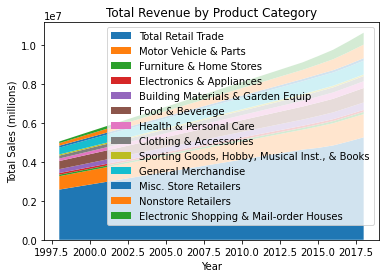

<Figure size 432x288 with 0 Axes>

In [59]:
# Plot
year = [2018, 2017, 2016, 2015, 2014, 1998]
totalrev_byproductcategory = {
    'Total Retail Trade': [5269468, 5053151, 4852958, 4725993, 4639440, 2581762],
    'Motor Vehicle & Parts': [1191321, 1172367, 1140614, 1094112, 1020851, 688415],
    'Furniture & Home Stores': [116895, 113035, 110404, 106570, 99718, 77412],
    'Electronics & Appliances': [100205, 98570, 99043, 103658, 105197, 82731],
    'Building Materials & Garden Equip': [381313, 365622, 348697, 331611, 318352, 202423],
    'Food & Beverage': [745736, 725137, 699349, 685381, 669165, 416525],
    'Health & Personal Care': [347454, 333338, 327153, 315244, 299263, 129583],
    'Clothing & Accessories': [268163, 260566, 260050, 255798, 250409, 149151],
    'Sporting Goods, Hobby, Musical Inst., & Books': [81179, 84188, 86483, 85701, 83787, 60441],
    'General Merchandise': [706298, 687123, 675389, 674889, 667163, 351081],
    'Misc. Store Retailers': [130130, 124538, 121572, 119350, 115878, 98369],
    'Nonstore Retailers': [696849, 629204, 561412, 509652, 470867, 133904],
    'Electronic Shopping & Mail-order Houses': [611743, 551298, 488840, 433987, 386065, 80297],
}

fig, ax = plt.subplots()
ax.stackplot(year, totalrev_byproductcategory.values(),
             labels=totalrev_byproductcategory.keys())
ax.legend(loc='upper right')
ax.set_title('Total Revenue by Product Category')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales (millions)')

plt.show()
plt.tight_layout()
plt.savefig("Total Revenue by Product Category")

In [60]:
retail_history_df

,2018 Total,2018 Ecommerce Total,2017 Total,2017 Ecommerce Total,2016 Total,2016 Ecommerce Total,2015 Total,2015 Ecommerce Total,2014 Total,2014 Ecommerce Total,1998 Total,1998 Ecommerce Total
Kind_of_Business,,,,,,,,,,,,
Total Retail Trade,5269468,519635,5053151,458916,4852958,397252,4725993,346188,4639440,302485,2581762,4984
Motor vehicle and parts dealers,1191321,35348,1172367,32106,1140614,30739,1094112,30145,1020851,27678,688415,382
Furniture and home furnishings stores,116895,1533,113035,1279,110404,1081,106570,996,99718,793,77412,0
Electronics and appliance stores,100205,2056,98570,2113,99043,2069,103658,1930,105197,1780,82731,NaN
Building mat. and garden equip. and supplies dealers,381313,2795,365622,2614,348697,2327,331611,1939,318352,0,202423,25
Food and beverage stores,745736,4837,725137,3431,699349,2371,685381,1843,669165,1596,416525,10
Health and personal care stores,347454,744,333338,0,327153,0,315244,0,299263,0,129583,0
Clothing and clothing access. Stores,268163,10981,260566,9374,260050,8134,255798,6970,250409,5717,149151,12
"Sporting goods, hobby, musical instrument, and book stores",81179,2617,84188,2441,86483,2307,85701,2103,83787,2192,60441,NaN


In [61]:
retail_history_df = retail_history_df.reset_index()

In [62]:
retail_history_df.columns

Index(['Kind_of_Business', '2018 Total', '2018 Ecommerce Total', '2017 Total',
       '2017 Ecommerce Total', '2016 Total', '2016 Ecommerce Total',
       '2015 Total', '2015 Ecommerce Total', '2014 Total',
       '2014 Ecommerce Total', '1998 Total', '1998 Ecommerce Total'],
      dtype='object')

In [63]:
retail_historymelted_df = retail_history_df.melt(id_vars=['Kind_of_Business'])

In [64]:
retail_historymelted_df

,Kind_of_Business,variable,value
0,Total Retail Trade,2018 Total,5269468
1,Motor vehicle and parts dealers,2018 Total,1191321
2,Furniture and home furnishings stores,2018 Total,116895
3,Electronics and appliance stores,2018 Total,100205
4,Building mat. and garden equip. and supplies d...,2018 Total,381313
...,...,...,...
151,"Sporting goods, hobby, musical instrument, and...",1998 Ecommerce Total,NaN
152,General merchandise stores,1998 Ecommerce Total,0
153,Miscellaneous store retailers,1998 Ecommerce Total,116
154,Nonstore retailers,1998 Ecommerce Total,4029


In [65]:
retail_historymelted_df.loc[retail_historymelted_df['variable'].str.contains('Total', case=False), 'Type']= 'Retail Total'
retail_historymelted_df.loc[retail_historymelted_df['variable'].str.contains('Ecommerce Total', case=False),'Type']= 'Ecommerce'

In [66]:
# Looking for only numbers - reg.ex = regular expression.
retail_historymelted_df['Year'] = retail_historymelted_df['variable'].str.extract('(\d+)', expand=False)
retail_historymelted_df['Year'] = retail_historymelted_df['Year'].astype(int)
retail_historymelted_df['value'] = retail_historymelted_df['value'].astype(float)

In [67]:
retail_historymelted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kind_of_Business  156 non-null    object 
 1   variable          156 non-null    object 
 2   value             154 non-null    float64
 3   Type              156 non-null    object 
 4   Year              156 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 6.2+ KB


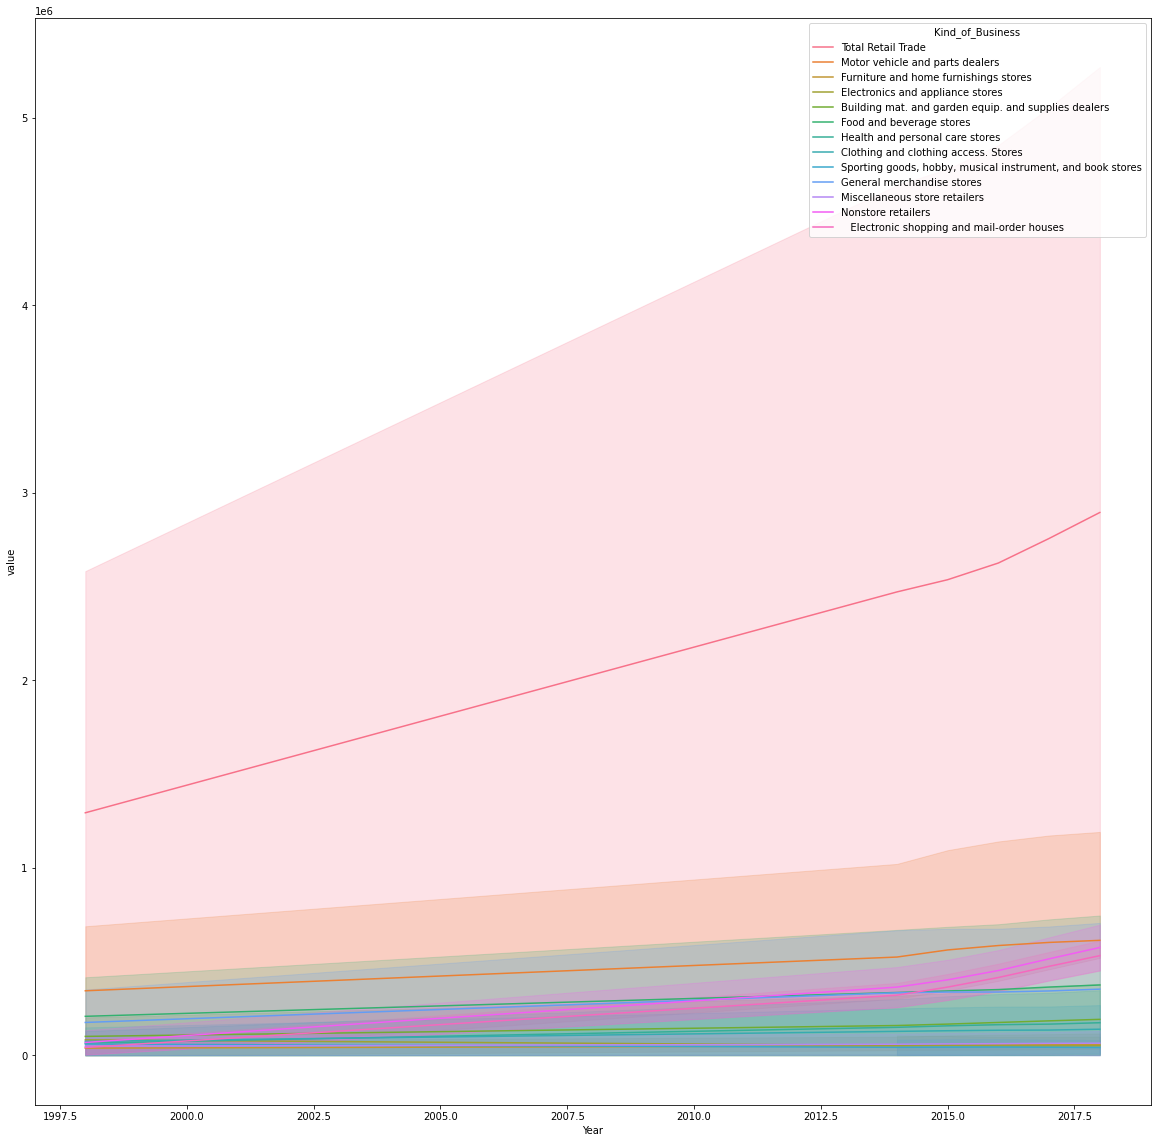

In [78]:
#Sns line plot
plt.figure(figsize=(20,20))
retail_history_plot = sns.lineplot(data=retail_historymelted_df, x='Year', y='value', hue='Kind_of_Business')
plt.show()

In [77]:
dir(retail_history_plot)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',

In [27]:
topfive_2018_df = pd.DataFrame({ '2018 Ecommerce Sales': [453584, 451635, 35348, 10981, 4837]},
                               index=['Nonstore  Retailers', 'E-Shopping & Mail-Order', 'Vehicle & Accessories',
                                     'Clothing', 'Food & Beverage'])
topfive_2018_df

,2018 Ecommerce Sales
Nonstore Retailers,453584
E-Shopping & Mail-Order,451635
Vehicle & Accessories,35348
Clothing,10981
Food & Beverage,4837


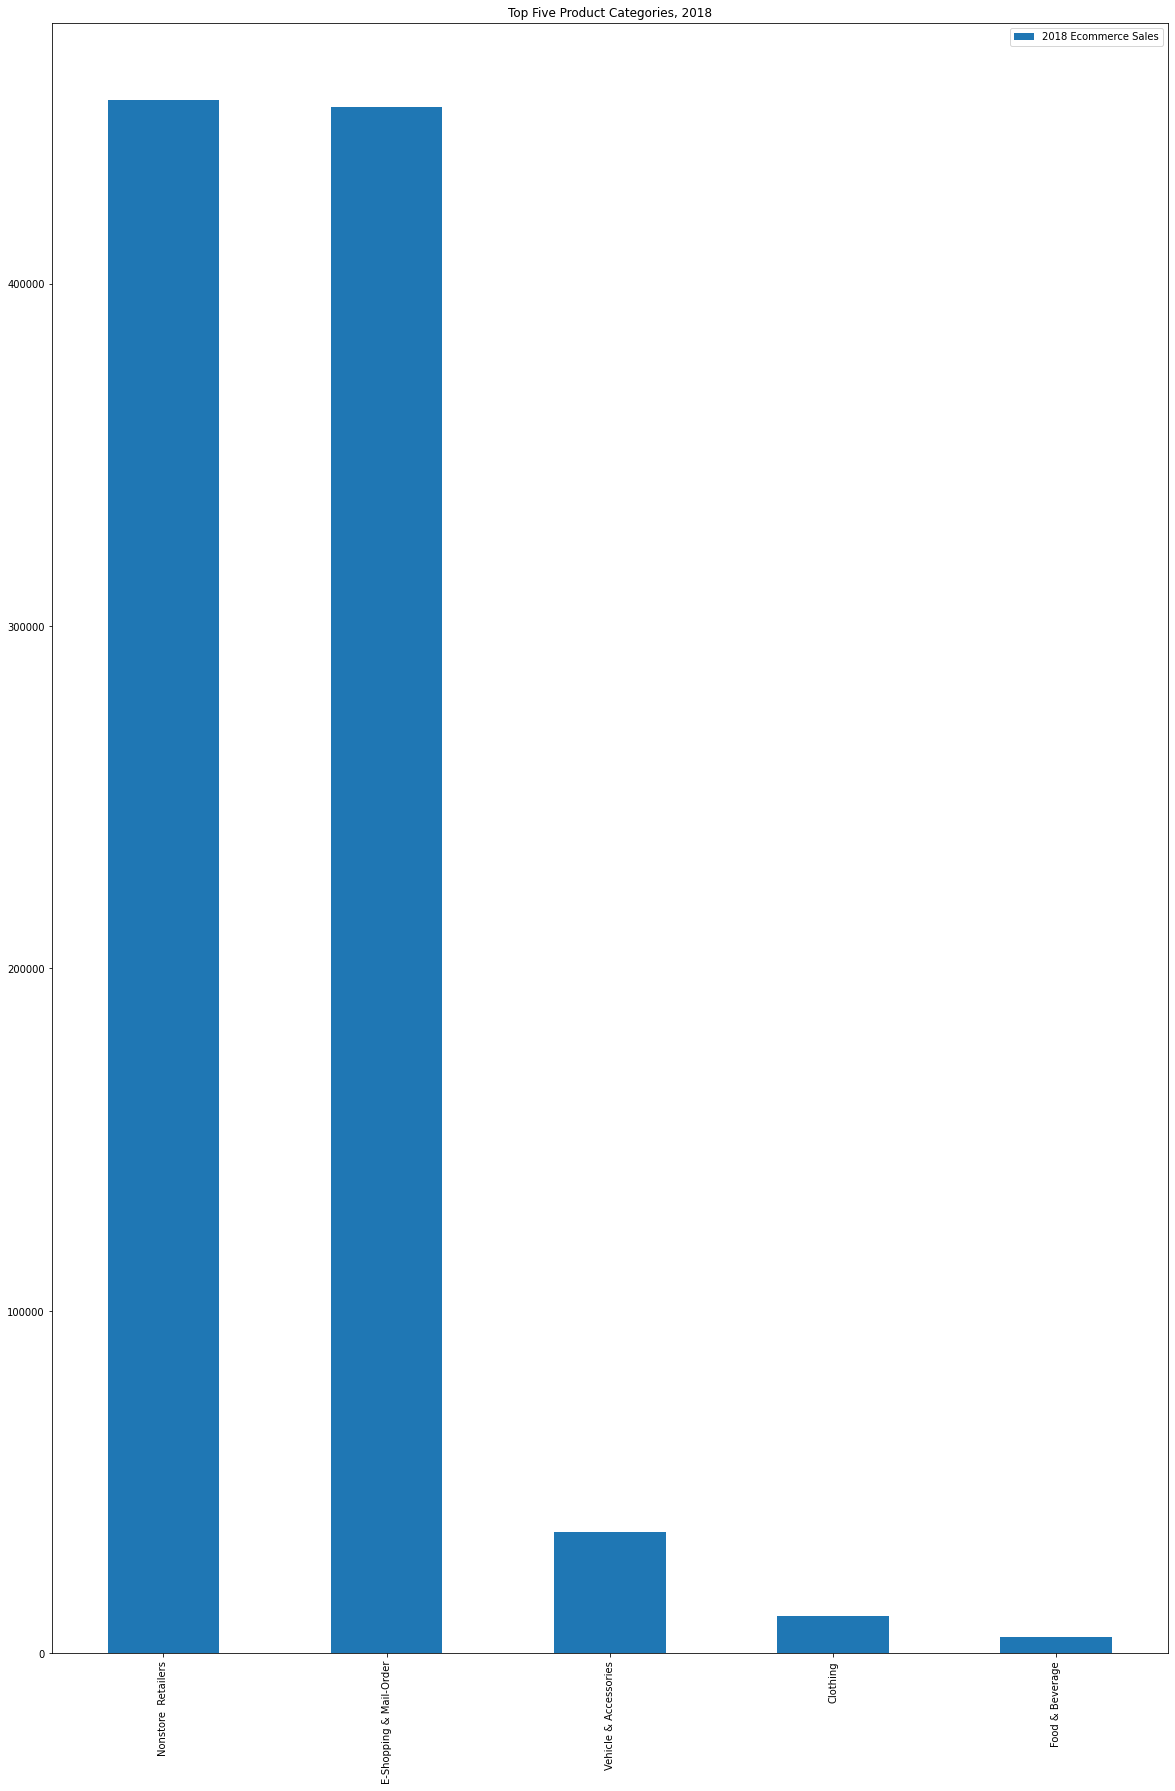

In [79]:
topfive_2018_df.plot(kind="bar", title="Top Five Product Categories, 2018", figsize=(20,30))
plt.xlabel = "Product Category"
plt.ylabel = "Total Sales (Millions)"
plt.savefig("Top Five Product Categories, 2018.png")

# Data Cleanup (US Retail Data - 2018 & 2017)

In [29]:
US_totalrev_df = pd.read_csv(US_totalrev_2018_2017_csv)
US_totalrev_df.head()

,Unnamed: 0,Industry,2018 Total Sales,2018 E-commerce,2017 Revised \nTotal Sales,2017 Revised \nE-commerce,Y/Y Percent Change Total Sales,Y/Y Percent Change E-commerce Sales,E-commerce as Percent of Total Sales 2018,E-commerce as Percent of Total Sales 2017,Percent Distribution\nof E-commerce Sales 2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Total Retail Trade,"5,269,468","519,635","5,053,151","458,916",4.3,13.2,9.9,9.1,100
3,441.0,Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106",1.6,10.1,3,2.7,6.8
4,442.0,Furniture and home furnishings stores,"116,895","1,533","113,035","1,279",3.4,19.9,1.3,1.1,0.3


In [30]:
# Drop Columns
US_totalrev_df = US_totalrev_df.drop(columns=['Unnamed: 0'])
US_totalrev_df.head()

,Industry,2018 Total Sales,2018 E-commerce,2017 Revised \nTotal Sales,2017 Revised \nE-commerce,Y/Y Percent Change Total Sales,Y/Y Percent Change E-commerce Sales,E-commerce as Percent of Total Sales 2018,E-commerce as Percent of Total Sales 2017,Percent Distribution\nof E-commerce Sales 2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total Retail Trade,"5,269,468","519,635","5,053,151","458,916",4.3,13.2,9.9,9.1,100
3,Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106",1.6,10.1,3,2.7,6.8
4,Furniture and home furnishings stores,"116,895","1,533","113,035","1,279",3.4,19.9,1.3,1.1,0.3


In [31]:
# Rename columns
US_totalrev_df = US_totalrev_df.rename(columns={"2018 E-commerce": "2018 Total ecommerce",
                                                "2017 Revised \nTotal Sales": "2017 Total Sales",
                                                "2017 Revised \nE-commerce": "2017 Total ecommerce",
                                                "Percent Distribution\nof E-commerce Sales 2018": 'Percent Distribution of ecommerce 2018'
                                                 })
US_totalrev_df.head()

,Industry,2018 Total Sales,2018 Total ecommerce,2017 Total Sales,2017 Total ecommerce,Y/Y Percent Change Total Sales,Y/Y Percent Change E-commerce Sales,E-commerce as Percent of Total Sales 2018,E-commerce as Percent of Total Sales 2017,Percent Distribution of ecommerce 2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total Retail Trade,"5,269,468","519,635","5,053,151","458,916",4.3,13.2,9.9,9.1,100
3,Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106",1.6,10.1,3,2.7,6.8
4,Furniture and home furnishings stores,"116,895","1,533","113,035","1,279",3.4,19.9,1.3,1.1,0.3


In [32]:
# Remove commas from the data
# remove commas from dataframe
US_totalrev_df.replace(',','', regex=True, inplace=True)
US_totalrev_df.head()

,Industry,2018 Total Sales,2018 Total ecommerce,2017 Total Sales,2017 Total ecommerce,Y/Y Percent Change Total Sales,Y/Y Percent Change E-commerce Sales,E-commerce as Percent of Total Sales 2018,E-commerce as Percent of Total Sales 2017,Percent Distribution of ecommerce 2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total Retail Trade,5269468,519635,5053151,458916,4.3,13.2,9.9,9.1,100
3,Motor vehicle and parts dealers,1191321,35348,1172367,32106,1.6,10.1,3,2.7,6.8
4,Furniture and home furnishings stores,116895,1533,113035,1279,3.4,19.9,1.3,1.1,0.3


In [33]:
# Removing first row
US_totalrev_df = US_totalrev_df.drop([0, 1])

In [34]:
# Reset Index
US_totalrev_df = US_totalrev_df.reset_index(drop=True)

In [35]:
US_totalrev_df = US_totalrev_df.set_index("Industry")

In [36]:
# Final DataFrame
# Need two separate dataframes for plotting
US_totalrev_df = US_totalrev_df.replace({'S': '0'})
US_totalrev_df

,2018 Total Sales,2018 Total ecommerce,2017 Total Sales,2017 Total ecommerce,Y/Y Percent Change Total Sales,Y/Y Percent Change E-commerce Sales,E-commerce as Percent of Total Sales 2018,E-commerce as Percent of Total Sales 2017,Percent Distribution of ecommerce 2018
Industry,,,,,,,,,
Total Retail Trade,5269468,519635,5053151,458916,4.3,13.2,9.9,9.1,100
Motor vehicle and parts dealers,1191321,35348,1172367,32106,1.6,10.1,3,2.7,6.8
Furniture and home furnishings stores,116895,1533,113035,1279,3.4,19.9,1.3,1.1,0.3
Electronics and appliance stores,100205,2056,98570,2113,1.7,-2.7,2.1,2.1,0.4
Building material and garden equipment and supplies dealers,381313,2795,365622,2614,4.3,6.9,0.7,0.7,0.5
Food and beverage stores,745736,4837,725137,3431,2.8,41,0.6,0.5,0.9
Health and personal care stores,347454,744,333338,0,4.2,0,0.2,0,0.1
Gasoline stations,503925,0,459463,0,9.7,0,0,0,0
Clothing and clothing accessories stores,268163,10981,260566,9374,2.9,17.1,4.1,3.6,2.1


In [37]:
# Totals df for plotting
# Non-store retail = do not have brick and mortar stores
total_plot_df = US_totalrev_df.iloc[: , [0, 1, 2, 3]].copy() 
total_plot_df

,2018 Total Sales,2018 Total ecommerce,2017 Total Sales,2017 Total ecommerce
Industry,,,,
Total Retail Trade,5269468,519635,5053151,458916
Motor vehicle and parts dealers,1191321,35348,1172367,32106
Furniture and home furnishings stores,116895,1533,113035,1279
Electronics and appliance stores,100205,2056,98570,2113
Building material and garden equipment and supplies dealers,381313,2795,365622,2614
Food and beverage stores,745736,4837,725137,3431
Health and personal care stores,347454,744,333338,0
Gasoline stations,503925,0,459463,0
Clothing and clothing accessories stores,268163,10981,260566,9374


In [38]:
totalrev_plot_df = pd.DataFrame({
    "2018 Total Sales":[1191321, 116895, 100205, 381313, 745736, 347454, 503925, 268163, 81179, 706298, 130130, 696849, 611743],
    "2018 Total Ecommerce Sales":[35348, 1533, 2056, 2795, 4837, 744, 0, 10981, 2617, 0, 0, 453584, 451635],
    "2017 Total Sales":[1172367, 113035, 98570, 365622, 725137, 333338, 459463, 260566, 84188, 687123, 124538, 629204, 551298],
    "2017 Total Ecommerce Sales":[32106, 1279, 2113, 2614, 3431, 0, 0, 9374, 2441, 0, 4014, 400279, 398415]
    }, 
    index=["Vehicle", "Furniture", 
           "Electronics", "Building material/Garden equip.",
          "Food & beverage", "Health & Personal", "Gasoline stations", "Clothing",
           "Sporting goods, hobby, musical instrument, and book stores", "General merchandise stores", "Misc. store retailers",
           "Nonstore retailers", "E-shopping and mail-order houses"
          ]
)
totalrev_plot_df

,2018 Total Sales,2018 Total Ecommerce Sales,2017 Total Sales,2017 Total Ecommerce Sales
Vehicle,1191321,35348,1172367,32106
Furniture,116895,1533,113035,1279
Electronics,100205,2056,98570,2113
Building material/Garden equip.,381313,2795,365622,2614
Food & beverage,745736,4837,725137,3431
Health & Personal,347454,744,333338,0
Gasoline stations,503925,0,459463,0
Clothing,268163,10981,260566,9374
"Sporting goods, hobby, musical instrument, and book stores",81179,2617,84188,2441
General merchandise stores,706298,0,687123,0


- Misc. store retailers = Establishments primarily engaged in the retail sale of specialized lines of merchandise, not elsewhere classified, such as artists'supplies; orthopedic and artificial limbs; rubber stamps; pets; religious goods; and monuments and tombstones.

- E-Shopping & mail-order houses = This industry comprises establishments primarily engaged in retailing all types of merchandise using nonstore means, such as catalogs, toll free telephone numbers, or electronic media, such as interactive television or the Internet. Included in this industry are establishments primarily engaged in retailing from catalog showrooms of mail-order houses.

    - Catalog (i.e., order-taking) offices of mail-order houses, Collectors' items, mail-order houses, Computer software, mail-order houses, Home shopping television orders, Internet auction sites, retail, Mail-order book clubs (not publishing), Mail-order houses, Web retailers
    - Top Companies include - Amazon, Ebay, Wayfair, QVC

In [39]:
# top five 2018 data
topfive_2018_df = pd.DataFrame({ '2018 Ecommerce Sales': [453584, 451635, 35348, 10981, 4837]},
                               index=['Nonstore  Retailers', 'E-Shopping & Mail-Order', 'Vehicle & Accessories',
                                     'Clothing', 'Food & Beverage'])
topfive_2018_df

,2018 Ecommerce Sales
Nonstore Retailers,453584
E-Shopping & Mail-Order,451635
Vehicle & Accessories,35348
Clothing,10981
Food & Beverage,4837


# Plots for 2018 & 2017 Top Five Product Categories

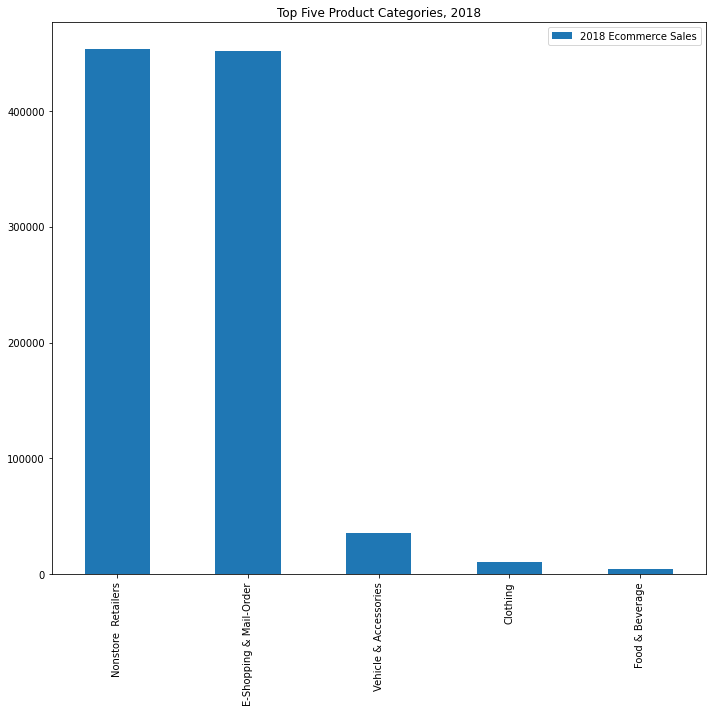

In [80]:
topfive_2018_df.plot(kind="bar", title="Top Five Product Categories, 2018", figsize=(10,10))
plt.xlabel = "Product Category"
plt.ylabel = "Total Sales (Millions)"
plt.savefig("Top Five Product Categories, 2018.png")
plt.tight_layout()

In [81]:
# top five 2017 data
topfive_2017_df = pd.DataFrame({'2017 Ecommerce Sales': [400279, 398415, 32106, 9374, 4014]},
                               index=['Nonstore  Retailers', 'E-Shopping & Mail-Order', 'Vehicle & Accessories',
                                     'Clothing', 'Misc. store retailers'])
topfive_2017_df

,2017 Ecommerce Sales
Nonstore Retailers,400279
E-Shopping & Mail-Order,398415
Vehicle & Accessories,32106
Clothing,9374
Misc. store retailers,4014


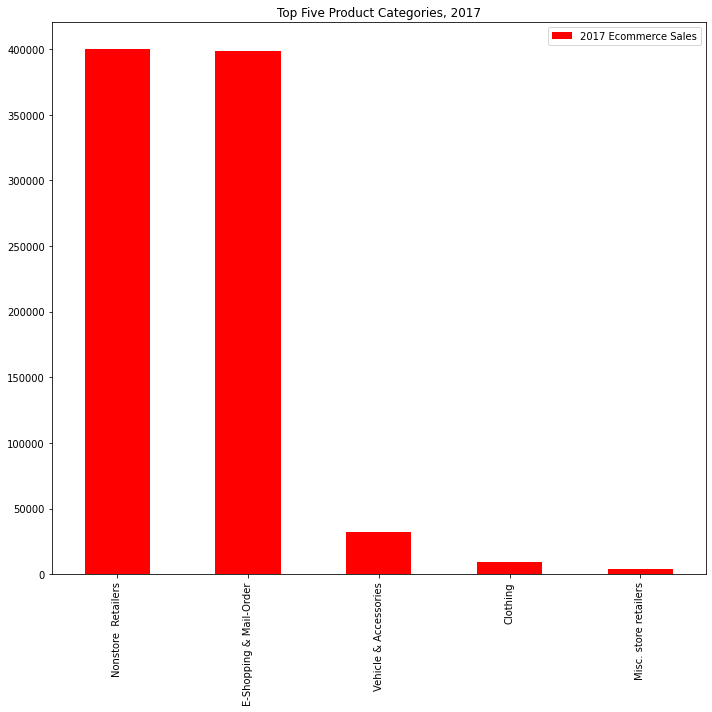

In [82]:
# top five 2017 plot
topfive_2017_df.plot(kind="bar", color='r', title="Top Five Product Categories, 2017", figsize=(10,10))
plt.xlabel = "Product Category"
plt.ylabel = "Total Sales (Millions)"
plt.savefig("Top Five Product Categories, 2017.png")
plt.tight_layout()

TypeError: 'str' object is not callable

<Figure size 720x576 with 0 Axes>

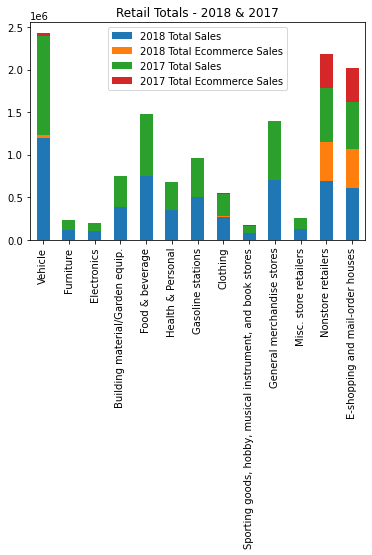

In [84]:
# Plot
plt.figure(figsize=(10,8))
totalrev_plot_df.plot(kind="bar", stacked=True)
plt.title("Retail Totals - 2018 & 2017")
plt.xlabel("Industry")
plt.ylabel("Sales in Millions ($)")

labels = []

plt.show()
plt.savefig("Retail Totals, 2018 & 2017.png")

In [ ]:
# Plot
plt.figure(figsize=(10,2))
totalrev_plot_df.plot(kind="barh", stacked=True)
plt.title("Retail Totals - 2018 & 2017")
plt.xlabel("Industry")
plt.ylabel("Sales in Millions ($)")

# Set xticks and lables
# xticks = 
# xticks(np.arange(0, 1, step=0.2)) 


plt.show()
plt.tight_layout()
plt.savefig("Retail Totals Stacked, 2018 & 2017.png")

In [ ]:
# Line Chart


In [ ]:
# percent change dataframe
percent_plot_df = US_totalrev_df.iloc[: , [4, 5, 6, 7, 8]].copy() 
percent_plot_df